# Manejo de Datos en Biología Computacional. Herramientas de Estadística: Trabajo Final.
## Fernando Leonel Da Rosa Jurao

## Introducción

 *   Un poco de contexto.

        Actualmente, estoy realizando el doctorado en el Instituto LEICI de la Facultad de Ingeniería de la UNLP. En particular, estoy involucrado en un proyecto de desarrollo de un dispositivo médico conocido como Páncreas Artificial (PA). El PA tiene como objetivo regular la glucemia en personas que padecen Diabetes Mellitus Tipo 1 (DMT1) y está compuesto por tres elementos principales: un monitor continuo de glucosa (CGM), una bomba de insulina y un algoritmo de control. Éste último recibe las medidas del CGM y calcula una dosis de insulina que luego es entregada por la bomba. Mi trabajo se centra, principalmente, en el desarrollo de estos algorimos utilizando distintas estrategias de control automático. Una parte fundamental en el desarrollo de controladores para PA, es la validación de las estrategias utilizadas. Gracias al avance de los distintos grupos de investigación alrededor del mundo, en la actualidad se dispone de simuladores que representan la dinámica de la glucemia en personas con DMT1. Además, existen modelos aprobados por la FDA (Food and Drug Administration) como reemplazo de los ensayos preclínicos en animales. Ésto nos permite validar y evaluar distintos tipos de técnicas de control únicamente realizando simulaciones en una computadora (validación in silico).



*    El origen de los datos utilizados

       En el grupo de trabajo se desarrolló un algoritmo de PA llamado Automatic Regulation of Glucose (ARG), el cual fue validado experimentalmente en los primeros ensayos clínicos de Latinoamérica. Este algoritmo utiliza un controlador llamado LQG (Linear Quadratic Gaussian), que a pesar de haber obtenido resultados satisfactorios en dichos ensayos, también resulta compleja su implementación y su funcionamiento no es simple de entender para el personal médico que participa en las pruebas. Por esta razón, se exploró la alternativa de utilizar un controlador más sencillo de implementar y comprender llamado PD (Proportional Derivative). Para contrastar el funcionamiento del nuevo controlador (PD) con el original (LQG), se utizó un simulador en donde se creó un escenario virtual. Los datos que se presentan en este trabajo son los resultados de la evolución temporal de glucemia obtenida en dichas simulaciones con cada estrategia. 

*    Escenario de simulacion

       En el escenario planteado se utilizó una población de 10 adultos, cada uno con caracteristicas únicas. Se les dió una comida de 70 gramos de carbohidratos exactamente a la misma hora (1 hora despues del inicio de la simulacion). Esta prueba se repitió dos veces para cada paciente virtual, es decir, una vez con cada estrategia (LQG y PD) en un periodo de observación de 8 horas por simulación.

*    Objetivo

       El objetivo de este trabajo es observar si exite una diferencia en la glucemia al utilizar la nueva estrategia.


Hipótesis nula (H0): No hay diferencia en el valor medio de la glucemia entre los dos tratamientos.

Hipótesis alternativa (H1): Existe una diferencia en el valor medio de la glucemia entre los dos tratamientos.

In [1]:
# Se importan las bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.stats.power import TTestIndPower

In [2]:
# Importación de los datos
# Nombre del archivo
file_name = 'tabla_glucosa.csv'
# Lectura del archivo
df = pd.read_csv(file_name)

# Se muestran las primeras filas del DataFrame
primeras_filas = df.head()
print(primeras_filas)

   lqg_adulto_1  lqg_adulto_2  lqg_adulto_3  lqg_adulto_4  lqg_adulto_5   
0    110.000000    110.000000    110.000000    110.000000    110.000000  \
1    110.000000    110.000000    110.000000    110.000000    110.000000   
2    109.999188    109.998190    109.999775    109.999875    109.999841   
3    109.997730    109.994985    109.999361    109.999641    109.999556   
4    109.995762    109.990710    109.998788    109.999309    109.999168   

   lqg_adulto_6  lqg_adulto_7  lqg_adulto_8  lqg_adulto_9  lqg_adulto_10   
0    110.000000    110.000000    110.000000    110.000000     110.000000  \
1    110.000000    110.000000    110.000000    110.000000     110.000000   
2    109.999980    109.999848    109.997535    109.999986     109.999985   
3    109.999944    109.999590    109.993323    109.999960     109.999958   
4    109.999895    109.999258    109.987874    109.999926     109.999921   

   pd_adulto_1  pd_adulto_2  pd_adulto_3  pd_adulto_4  pd_adulto_5   
0   110.000000   110.0

Tando en el histograma de cada columna como en el test de normalidad, se observa que no se puede considerar que los datos siguen una distribucion normal.
A continuación, se muestran gráficos de la media y la desviación típica de cada columna

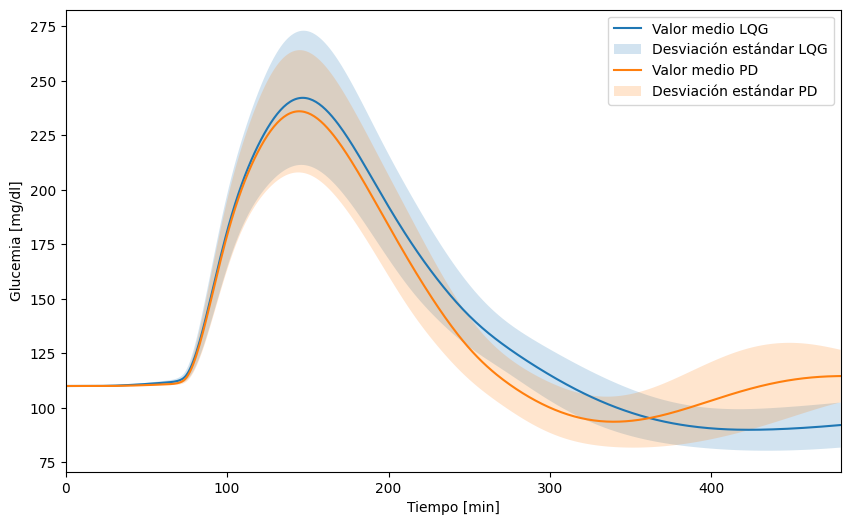

In [8]:
%matplotlib inline
#%matplotlib qt

# Separacion de datos para cada estrategia

lqg = df.iloc[:,0:10]
pd  = df.iloc[:,10:20]
t   = np.arange(0, len(lqg), 1)

# Cálculo del valor medio y desviación estándar de cada una
vm_lqg  = np.mean(lqg,axis=1)
std_lqg = np.std(lqg,axis=1)
vm_pd   = np.mean(pd,axis=1)
std_pd  = np.std(pd,axis=1)

# Presentación de gráficos 
plt.figure(figsize=(10,6))
plt.plot(t,vm_lqg,label='Valor medio LQG')
plt.fill_between(t,vm_lqg-std_lqg,vm_lqg+std_lqg, alpha=0.2, label='Desviación estándar LQG')
plt.plot(t,vm_pd,label='Valor medio PD')
plt.fill_between(t,vm_pd-std_pd,vm_pd+std_pd, alpha=0.2, label='Desviación estándar PD')
plt.xlim(t[0], t[len(lqg)-1])
plt.ylabel("Glucemia [mg/dl]")
plt.xlabel("Tiempo [min]")
plt.legend()
plt.show()